<a href="https://colab.research.google.com/github/ashwith-nagendra/IIITH-AIML/blob/main/AIML_Module_4_Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, 'y')

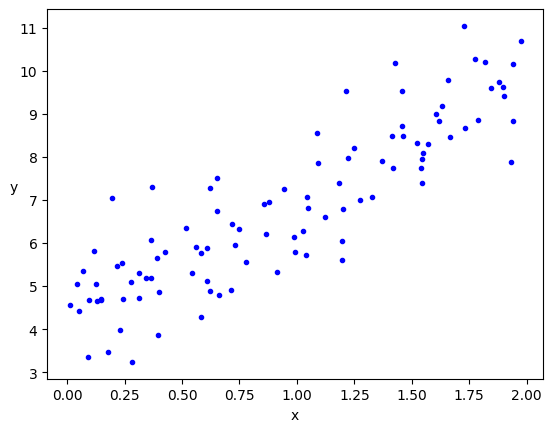

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

In [5]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

In [7]:
X = np.array([[1, 2], [1, 3], [1, 4]])
y = np.array([[5], [6], [7]])
y_pred = np.array([0.5, 0.5])

cost = cal_cost(y_pred, X, y)
print(cost)

227.25


In [6]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

In [14]:
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([[1], [2], [3]])
y_pred = np.random.randn(2, 1)

y_pred, cost_history, y_pred_history = gradient_descent(X, y, y_pred, learning_rate=0.1, iterations=100)

print("Final Parameters (y_pred):", y_pred)
print("Cost History:", cost_history)
print("y_pred History:", y_pred_history)

Final Parameters (y_pred): [[-0.02441632]
 [ 1.01074078]]
Cost History: [6.16785782e-01 1.25613631e-01 2.81165043e-02 8.70247316e-03
 4.77721603e-03 3.92577603e-03 3.68573682e-03 3.56866289e-03
 3.47763766e-03 3.39339909e-03 3.31208806e-03 3.23290136e-03
 3.15564279e-03 3.08023744e-03 3.00663531e-03 2.93479217e-03
 2.86466576e-03 2.79621502e-03 2.72939991e-03 2.66418133e-03
 2.60052114e-03 2.53838210e-03 2.47772786e-03 2.41852295e-03
 2.36073273e-03 2.30432339e-03 2.24926195e-03 2.19551619e-03
 2.14305468e-03 2.09184673e-03 2.04186238e-03 1.99307241e-03
 1.94544826e-03 1.89896208e-03 1.85358668e-03 1.80929552e-03
 1.76606269e-03 1.72386291e-03 1.68267148e-03 1.64246431e-03
 1.60321788e-03 1.56490925e-03 1.52751599e-03 1.49101624e-03
 1.45538864e-03 1.42061236e-03 1.38666705e-03 1.35353286e-03
 1.32119041e-03 1.28962078e-03 1.25880549e-03 1.22872653e-03
 1.19936631e-03 1.17070764e-03 1.14273377e-03 1.11542833e-03
 1.08877534e-03 1.06275923e-03 1.03736477e-03 1.01257710e-03
 9.88381730e-

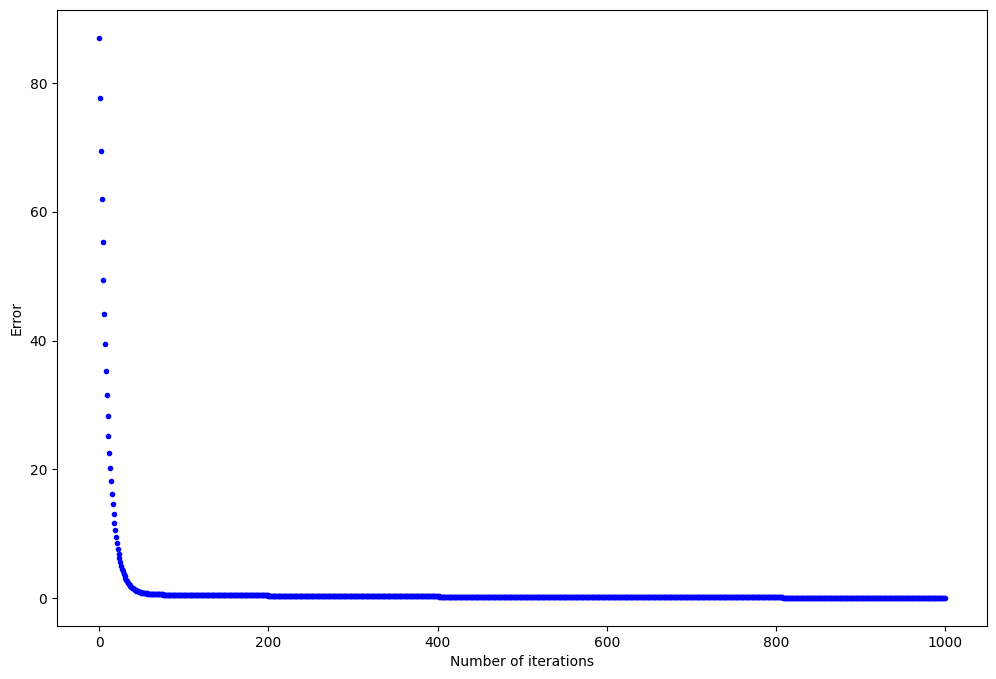

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

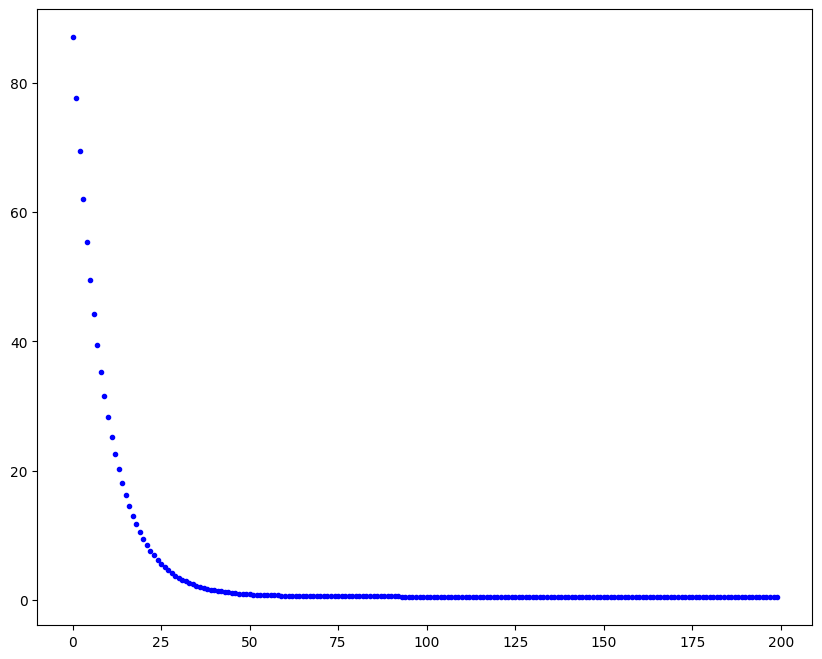

In [22]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

In [23]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [24]:
import numpy as np

X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([[1], [2], [3]])
y_pred = np.random.randn(2, 1)

final_weights, cost_history = stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100)

print("Final weights:", final_weights)
print("Cost history:", cost_history)

Final weights: [[0.74793572]
 [0.65594982]]
Cost history: [1.89724649e+01 2.12320180e+01 2.45624744e+01 2.64865826e+01
 1.91804481e+01 1.71684015e+01 2.81082277e+00 1.80998795e+01
 2.04618848e+01 1.73000881e+01 9.22525259e+00 1.00209268e+01
 4.27673071e+00 3.95558596e+00 7.63625963e+00 5.49228792e+00
 4.85326305e-01 4.83066690e+00 7.09287437e+00 3.63316535e+00
 3.96785419e+00 4.17801232e+00 2.98104175e+00 5.72557911e-01
 3.52225635e+00 3.06724926e-02 8.14546720e-01 1.96986093e+00
 3.32888737e-01 8.16141663e-03 2.13654545e+00 1.20135929e+00
 1.88936919e+00 1.84762151e-01 1.79652885e-01 8.76931667e-01
 3.00135074e-01 2.82505278e-01 7.30650932e-01 6.67473599e-01
 2.94462088e-01 5.73126292e-01 5.80192430e-01 9.90298437e-02
 4.68951648e-01 4.33258691e-01 3.81196019e-01 6.39804624e-01
 3.38040393e-01 3.23826479e-01 3.13659760e-01 8.20818653e-02
 4.60040931e-01 2.53707449e-01 6.99453684e-02 3.82226626e-02
 3.88170878e-01 6.56497783e-02 2.55249469e-01 1.46782548e-01
 1.03977682e-01 2.55520539e

In [26]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: -0.002
y_pred[1]: 1.001
Final error: 0.000


Which of the following is TRUE, given the optimal learning rate?

(i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

(ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

(iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

(iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

(v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

(vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

The true statement given the optimal learning rate is:

(v) For convex loss functions (i.e., with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

In the context of convex loss functions, both batch gradient descent and stochastic gradient descent are capable of reaching the global minimum when using an appropriate learning rate. Batch gradient descent computes the gradient using all training examples and follows a smooth path to the minimum. Stochastic gradient descent uses only one or a few training examples and introduces more noise into each step, but with proper adjustments, it also finds its way to the minimum over time.